## Titanic - Data Analysis ##


***Vidya Bhandary***

Beginer work in machine learning.  Inspired by the following -

1. https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
2. https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
3. https://www.kaggle.com/ash316/eda-to-prediction-dietanic
4. https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83 

*Aug 2019*

- <a href='#1'>1. Introduction </a>  
    - <a href='#1.1'>1.1. Load libraries, read and check the data</a> 
- <a href='#2'>2. Exploratory Data Analysis </a> 
    - <a href='#2.1'>2.1. Survival </a> 
    - <a href='#2.2'>2.2. Class and Gender  </a> 
    - <a href='#2.3'>2.3. Other attributes </a> 
- <a href='#3'>3. Missing Values, Feature Engineering and Data Cleaning </a>
    - <a href='#3.1'>3.1. Handling Missing Values </a> 
    - <a href='#3.2'>3.2. Feature Engineering </a>
    - <a href='#3.3'>3.3. Data Cleaning   </a>
- <a href='#4'>4. Models</a>
	- <a href='#4.1'>4.1. Pipeline, ColumnTransformer </a> 
	- <a href='#4.2'>4.2. Split Data</a>
    - <a href='#4.3'>4.3. Evaluate Models </a> 
- <a href='#5'>5. Hyper Parameters</a> 
    - <a href='#5.1'>5.1. Hyper Parameter Tuning</a> 
    - <a href='#5.2'>5.2. Choose final prediction model</a>
    - <a href='#5.3'>5.3. Prediction! </a>
- <a href='#6'>6. Submission </a> 

# <a id='1'>1. Introduction </a> 

The sinking of the Titanic is one of the most infamous shipwrecks in history. It was considered an unsinkable ship.
Unfortunately on April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg.
1502 out of 2224 passengers and crew died. 

In this notebook an analysis is made to predict which type of people were likely to survive.

## <a id='1.1'>1.1. Load libraries, read and check the data</a> 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

# To plot the figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

['gender_submission.csv', 'test.csv', 'train.csv']


In [2]:
train=pd.read_csv('../input/train.csv')

In [3]:
test=pd.read_csv('../input/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The features:
- **PassengerId**: Unique passenger Id for each passenger
- **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- **Pclass**: passenger class. 1st = Upper, 2nd = Middle, 3rd = Lower
- **Name, Sex, Age**: self-explanatory
- **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
- **Parch**: how many children & parents of the passenger aboard the Titanic.
- **Ticket**: ticket id
- **Fare**: price paid (in pounds)
- **Cabin**: passenger's cabin number
- **Embarked**: where the passenger embarked the Titanic - C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train.shape

(891, 12)

> **Observation(s)** 
- We have data of **891** passengers along with **12** features for each passenger


Taking a look at the first few rows of the test data.

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.shape

(418, 11)

> **Observation(s)** 
- We have data for **481** passengers in the test set

Checking for missing data in the training dataset

In [8]:
# Missing Data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> **Observation(s)** 
- In the training data - the feature **'Cabin'** has the most missing values
- Next is the **'Age'** feature with most missing values
- The **Embarked** feature has only 2 missing values

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

> **Observation(s)** 
- In the test data - the feature **'Cabin'** has the most missing values.
- Next is the **'Age'** feature with most missing values
- The **Fare** feature has only 1 missing value

In [11]:
# Looking at the numerical data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> **Observation(s)** 

- #### Only 38% survived !
- Mean Age was less than **30** years


# <a id='2'>2. Exploratory Data Analysis </a> 

## <a id='2.1'>2.1. Survival</a> 

In [12]:
# Survived feature
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

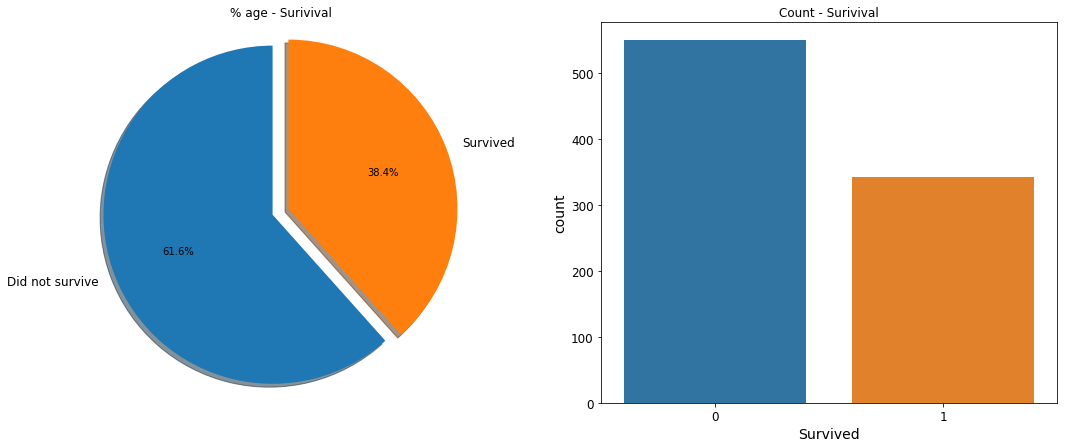

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
pieLabels = ['Did not survive', 'Survived']

ax[0].pie(train['Survived'].value_counts(), explode=[0.05, 0.05], autopct='%1.1f%%', labels=pieLabels, shadow=True, 
          startangle=90)
ax[0].axis('equal')
ax[0].set_title('% age - Surivival')

sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count - Surivival')

plt.show()

> **Observation(s)** 

### Only 38.4% survived !

## <a id='2.2'>2.2. Class and Gender </a> 

## 1. Pclass

In [14]:
# Pclass feature

train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
pd.crosstab(train['Pclass'], train['Survived']).style.background_gradient(cmap='cool')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


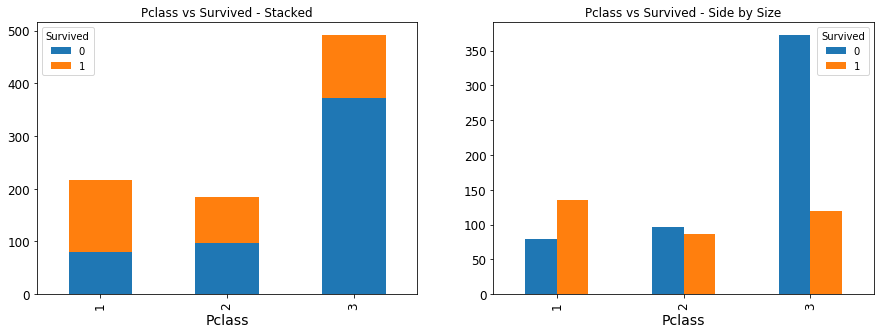

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
train.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',stacked=True, ax=ax[0])
train.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',stacked=False, ax=ax[1])
ax[0].set_title('Pclass vs Survived - Stacked')
ax[1].set_title('Pclass vs Survived - Side by Size')
plt.show()

> **Observation(s)** 
- On average people belonging to **1st class** had a better chance of survival

## 2. Sex

In [18]:
# Gender aka Sex

train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(train['Sex'], train['Survived']).style.background_gradient(cmap='cool')

Survived,0,1
Sex,,
female,81,233
male,468,109


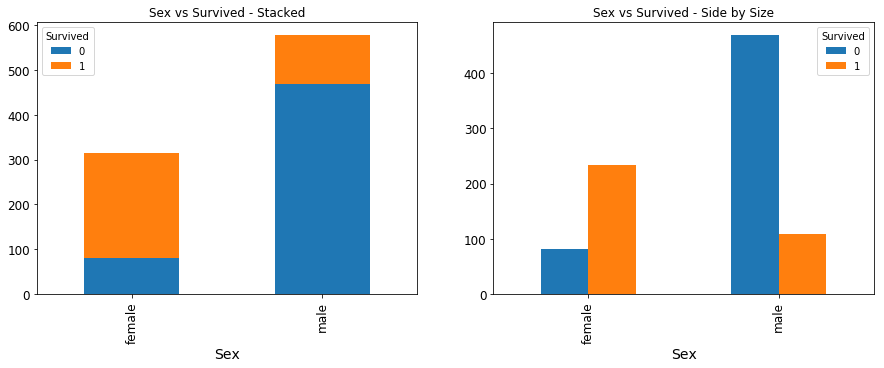

In [21]:
fix, ax = plt.subplots(1, 2, figsize=(15, 5))
train.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax[0])
train.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=False, ax=ax[1])

ax[0].set_title('Sex vs Survived - Stacked')
ax[1].set_title('Sex vs Survived - Side by Size')
plt.show()

> **Observation(s)** 
- Women had a better chance of survival than men

### 3. Pclass, Sex and Survival

In [22]:
# How does Pclass and Sex together compare wrt Survival ?

pd.crosstab([train['Sex'], train['Survived']], train['Pclass'], margins=True).style.background_gradient(cmap='cool')

In [23]:
train.groupby('Pclass').apply(lambda x:x.groupby('Sex')['Survived'].mean()).style.background_gradient(cmap='cool')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.5,0.135447


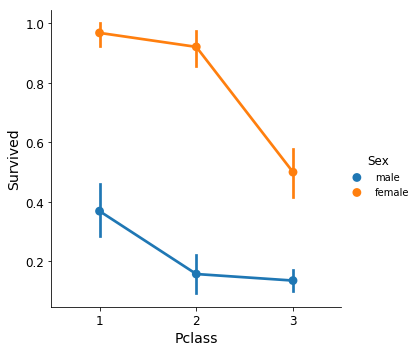

In [24]:
sns.catplot('Pclass', 'Survived', hue='Sex', data=train, kind='point')
plt.show()

> **Observation(s)** 
- Women from 1st class and 2nd class had a better chance of survival. ( ~96% and 92% on average)
- Women from 3rd class had lesser chance compared to women from other classes (~50%) but still better than men in any class 
- Men from all classes had lesser chance of survival overall. This agrees with the dictum - Women and children were given priority

## <a id='2.3'>2.3. Other attributes </a> 

### 4. SibSp

In [25]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().style.background_gradient(cmap='cool')

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.25
4,4,0.166667
5,5,0
6,8,0


In [26]:
pd.crosstab(train['SibSp'], train['Survived']).style.background_gradient(cmap='cool')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


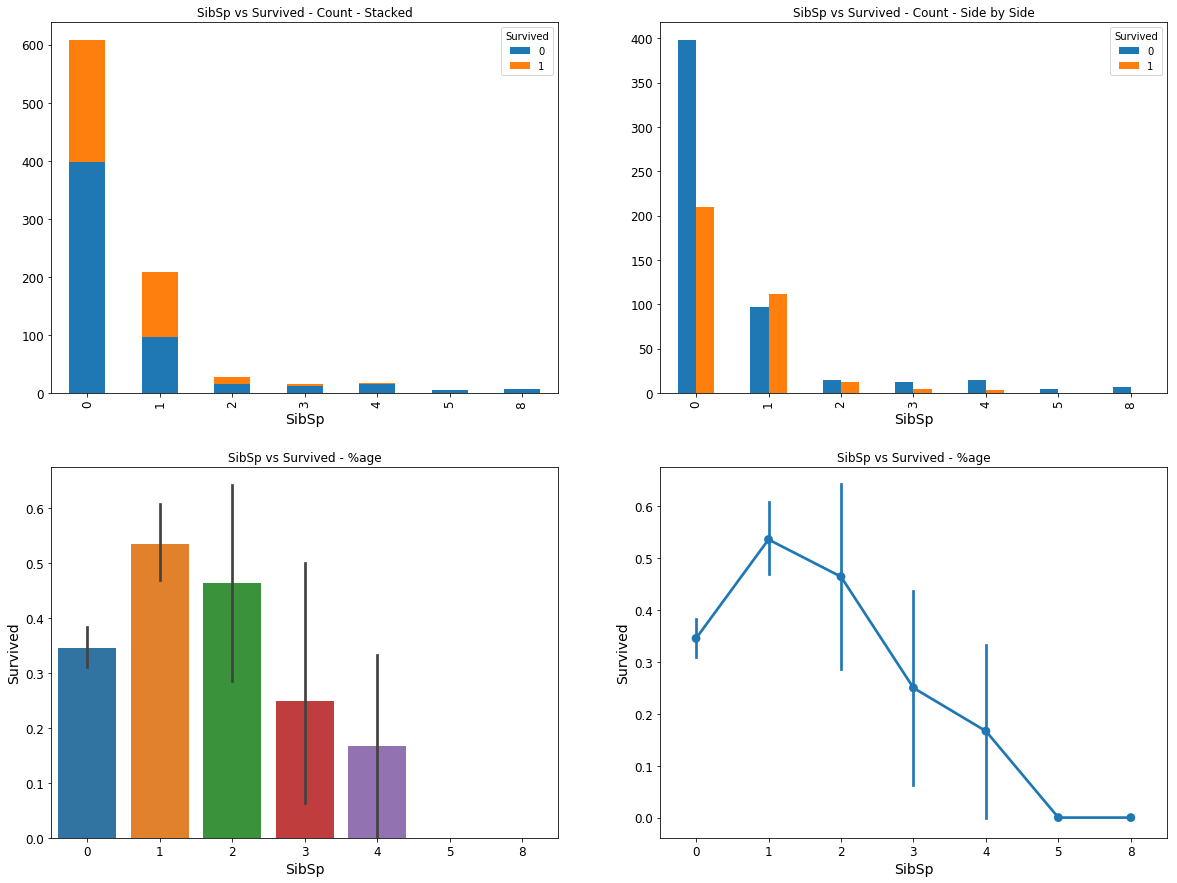

In [27]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))

train.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax[0, 0])
train.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=False, ax=ax[0, 1])
ax[0, 0].set_title('SibSp vs Survived - Count - Stacked')
ax[0, 1].set_title('SibSp vs Survived - Count - Side by Side')

sns.barplot('SibSp','Survived', data=train, ax=ax[1, 0])
ax[1, 0].set_title('SibSp vs Survived - %age')

sns.catplot('SibSp','Survived', data=train, ax=ax[1, 1], kind='point')
ax[1, 1].set_title('SibSp vs Survived - %age')

plt.close(2)
plt.show()

> **Observation(s)** 
- Passengers with 1 sibling - had better chance of survival. More than that survival chances start to decline 

### 5. Parch

In [28]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().style.background_gradient(cmap='cool')

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.5
3,3,0.6
4,4,0
5,5,0.2
6,6,0


In [29]:
pd.crosstab(train['Parch'], train['Survived']).style.background_gradient(cmap='cool')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


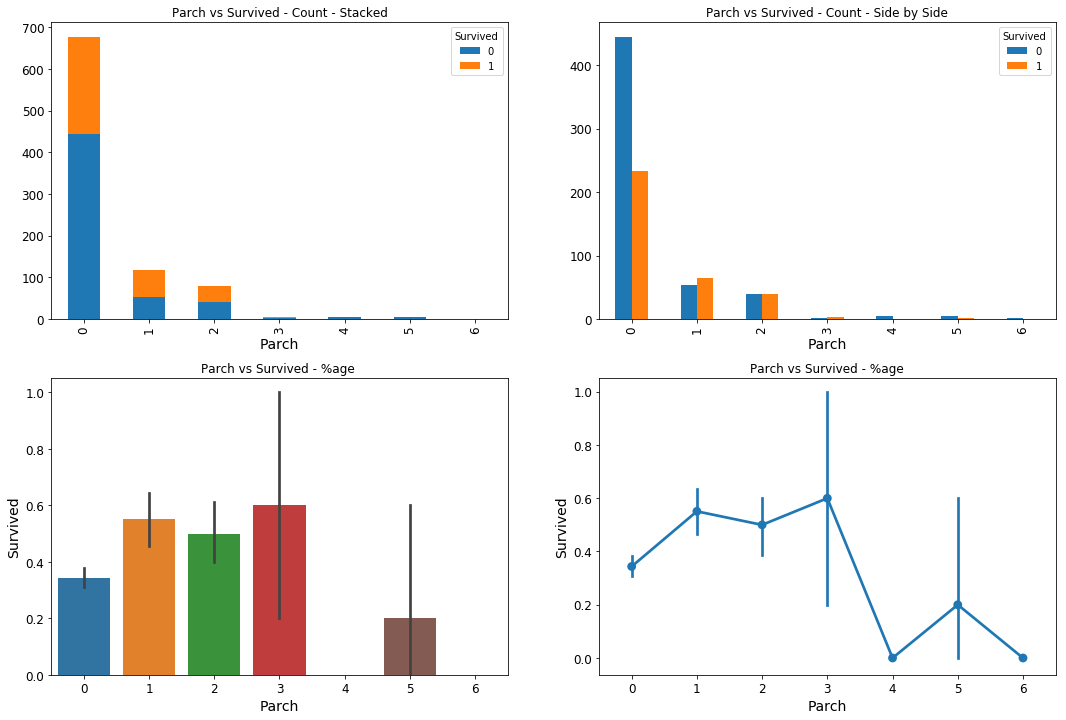

In [30]:
f, ax = plt.subplots(2, 2, figsize=(18, 12))
train.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax[0, 0])
train.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=False, ax=ax[0, 1])
ax[0, 0].set_title('Parch vs Survived - Count - Stacked')
ax[0, 1].set_title('Parch vs Survived - Count - Side by Side')
sns.barplot('Parch','Survived', data=train, ax=ax[1, 0])
sns.catplot('Parch','Survived', data=train, ax=ax[1, 1], kind='point')
ax[1, 0].set_title('Parch vs Survived - %age ')
ax[1, 1].set_title('Parch vs Survived - %age')
plt.close(2)
plt.show()

> **Observation(s)** 
- Passengers with upto 3 family members - parents and child - had better chance of survival. More than that survival chances start to decline sharply
- Consider the numbers - for the 5 passengers with 3 family members the average is 60% survival - 3 of them survived out of 5

### 6. Cabin

In [31]:
train['Cabin'].nunique()

147

> **Observation(s)** 
- There are only 147 unique IDs for 891 cabins - This means multiple passengers are assigned to same cabins
- This makes sense when you consider that family members would have the same cabin
- There are too many values missing. - 687 of 891 which is approximately 77% 
- For now it makes sense to ignore this feature

### 7. Ticket and PassengerId

In [32]:
train['Ticket'].nunique()

681

In [33]:
train['PassengerId'].nunique()

891

> **Observation(s)** 
- There are only 681 unique ticket IDs for 891 cabins - This means multiple passengers were assigned to same ticket
- Perhaps the infants travelled on the parent's ticket
- The combination of alphanumeric characters in ticket ID do not seem to follow any specific convention - to indicate any correlation to survival chances
- The Passenger ID is a running number 
- For now it makes sense to ignore both these features

# <a id='3'>3. Missing Values, Feature Engineering and Data Cleaning </a> 

## <a id='3.1'>3.1. Handling Missing Values </a> 

### 1. Embarked

In [34]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
# Since there are only two missing values we can replace them with the most frequent value 'S'
# There's no missing data for the feature 'Embarked' in the test data

train['Embarked'].fillna('S', inplace=True)

In [36]:
# Checking
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().style.background_gradient(cmap='cool')

,Embarked,Survived
0,C,0.553571
1,Q,0.38961
2,S,0.339009


In [38]:
pd.crosstab(train['Embarked'],train['Survived']).style.background_gradient(cmap='cool')

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


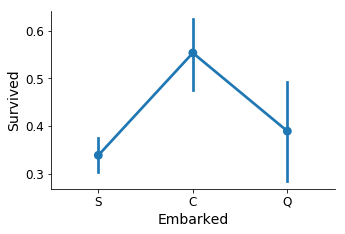

In [39]:
sns.catplot('Embarked','Survived', data=train, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

> **Observation(s)** 
- On average people who embarked at port C had a better chance of survival

### 2. Embarked vs Pclass, Survival and Sex

In [40]:
pd.crosstab(train['Embarked'],train['Pclass']).style.background_gradient(cmap='cool')

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


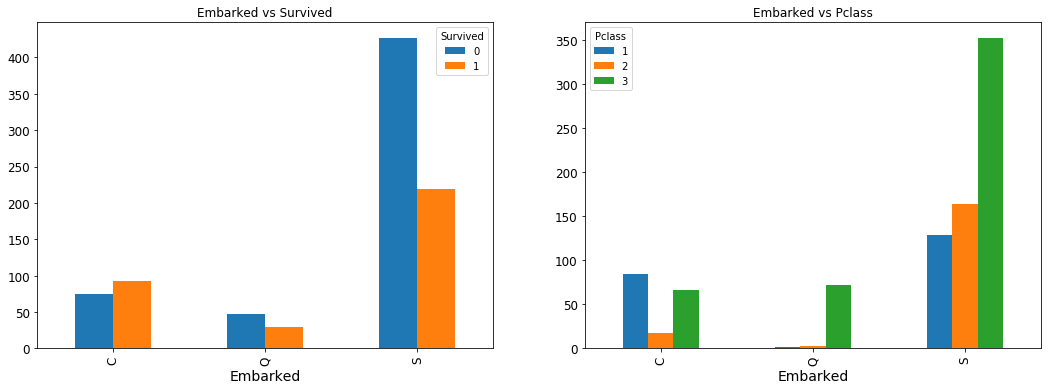

In [41]:
f, ax = plt.subplots(1,2, figsize=(18, 6))
train.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', stacked=False, ax=ax[0])
train.groupby(['Embarked', 'Pclass']).size().unstack().plot(kind='bar', stacked=False, ax=ax[1])
ax[0].set_title('Embarked vs Survived')
ax[1].set_title('Embarked vs Pclass')
plt.show()

> **Observation(s)** 
- Maximum number of people boarded from port S
- Most of the passengers from port Q - were 3rd class passengers

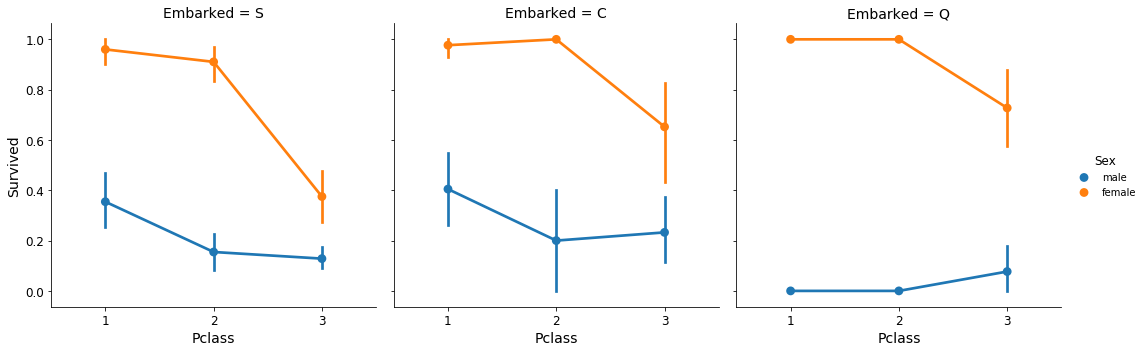

In [42]:
sns.catplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train, kind='point')
plt.show()

> **Observation(s)** 
- At all ports chances of survival for women belonging to first class and second class were higher
- At port S - many women belonging to 3rd class perished. Similarly for port C - survival chances for women from 3rd class were lesser 
- Even though total survival average is higher for port C(~55%) and port Q(~39%) - women belonging to 3rd class had lesser chances of survival
- At port Q - overall chances for men were absymal - but there was a slight increase of average percentage survival for men belong to 3rd class when compared to the other classes
- At port S and C - Men from 1st class had better chances of survival when compared to men from other classes

## <a id='3.2'>3.2. Feature Engineering </a> 

Looking at the other features of the training data, intelligently filling in missing values, combining features, creating categories as required.

### 1. FamilySize = SibSp + Parch

Combining the Sibling/Spouse and Parents/Children features to a single FamilySize feature and checking its impact

In [43]:
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

In [44]:
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().style.background_gradient(cmap='cool')

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.2
5,5,0.136364
6,6,0.333333
7,7,0
8,10,0


In [45]:
pd.crosstab(train['FamilySize'], train['Survived']).style.background_gradient(cmap='cool')

Survived,0,1
FamilySize,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


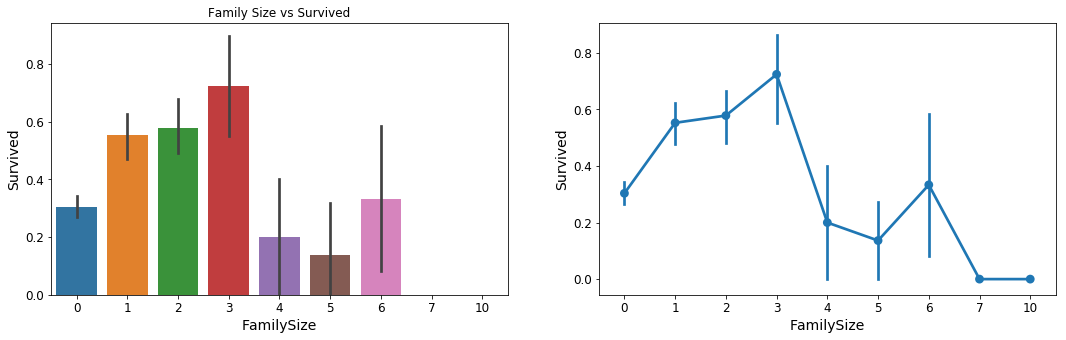

In [46]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot('FamilySize', 'Survived', data=train, ax=ax[0])
ax[0].set_title('Family Size vs Survived')
sns.catplot('FamilySize', 'Survived', data=train, ax=ax[1], kind='point')
ax[0].set_title('Family Size vs Survived')
plt.close(2)
plt.show()

> **Observation(s)** 
- FamilySize upto 3 shows a good chance of survival - beyond that the chances decline sharply (with an increase around 6)

### 2. Fare

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
# Create a fare category 

test['Fare'].fillna(test['Fare'].median(), inplace = True)

train['FareCategory'] = pd.qcut(train['Fare'], 5)
test['FareCategory'] = pd.qcut(test['Fare'], 5)

In [49]:
train['Fare_Code'] = LabelEncoder().fit_transform(train['FareCategory'])

In [50]:
test['Fare_Code'] = LabelEncoder().fit_transform(test['FareCategory'])

In [51]:
train[['Fare_Code', 'Survived']].groupby(['Fare_Code']).mean().style.background_gradient(cmap='cool')

,Survived
Fare_Code,
0,0.217877
1,0.201087
2,0.424419
3,0.444444
4,0.642045


In [52]:
pd.crosstab(train['Fare_Code'], train['Survived']).style.background_gradient(cmap='cool')

Survived,0,1
Fare_Code,,
0,140,39
1,147,37
2,99,73
3,100,80
4,63,113


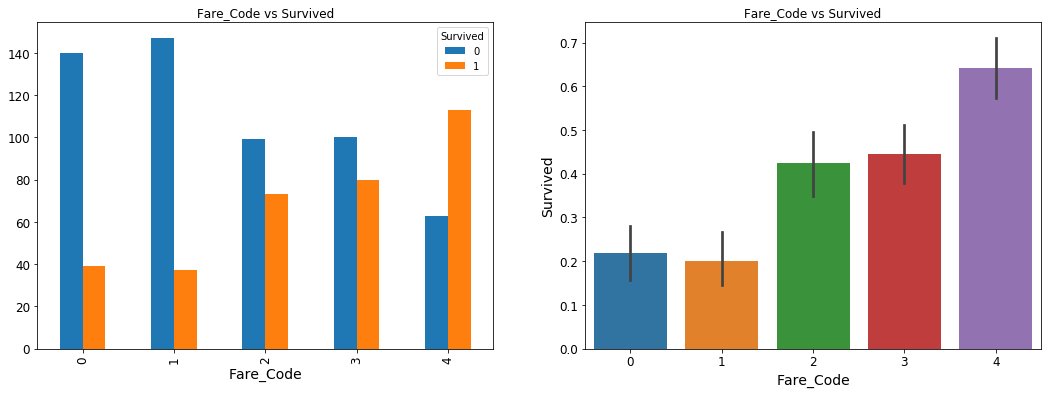

In [53]:
f, ax = plt.subplots(1,2, figsize=(18, 6))
train.groupby(['Fare_Code','Survived']).size().unstack().plot(kind='bar', ax=ax[0])
sns.catplot('Fare_Code', 'Survived', data=train, kind='bar', ax=ax[1])
ax[0].set_title('Fare_Code vs Survived')
ax[1].set_title('Fare_Code vs Survived')
plt.close(2)
plt.show()

> **Observation(s)** 
- Higher the fare - better the chaces of survival

### 3. Age, Name and Title

Age has 177 missing values ~20% of the data. We could fill this with the median value but a better strategy would be to extract the salutation from the name and use it to assign the ages appropriately.

Note : This strategy was taken from - https://www.kaggle.com/ash316/eda-to-prediction-dietanic

### Extract the title from the name

In [54]:
# Extract portion before the '.'

train['Title'] = 0
for salut in train:
    train['Title'] = train.Name.str.extract('([A-Za-z]+)\.')
    
test['Title'] = 0
for salut in test:
    test['Title'] = test.Name.str.extract('([A-Za-z]+)\.')  

In [55]:
pd.crosstab(train['Title'], train['Sex']).T.style.background_gradient(cmap='cool')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


### Replace the rare titles

In [56]:
# Replacing the titles 
mapping = {'Mlle': 'Miss', 
           'Major': 'Mr', 
           'Col': 'Mr', 
           'Sir': 'Mr', 
           'Don': 'Mr',
           'Mme': 'Miss',
           'Jonkheer': 'Mr',
           'Lady': 'Mrs', 
           'Capt': 'Mr', 
           'Countess': 'Mrs', 
           'Ms': 'Miss', 
           'Dona': 'Mrs'
           }
train.replace({'Title': mapping}, inplace=True)
test.replace({'Title': mapping}, inplace=True)

###  Replace age with median age for each title in train and test data

In [57]:
data_df = train.append(test)

titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute    

In [58]:
# Substituting Age values in TRAIN_DF and TEST_DF:
train['Age'] = data_df['Age'][:891]
test['Age'] = data_df['Age'][891:]

In [59]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().style.background_gradient(cmap='cool')

,Title,Survived
0,Dr,0.428571
1,Master,0.575
2,Miss,0.704301
3,Mr,0.16
4,Mrs,0.795276
5,Rev,0


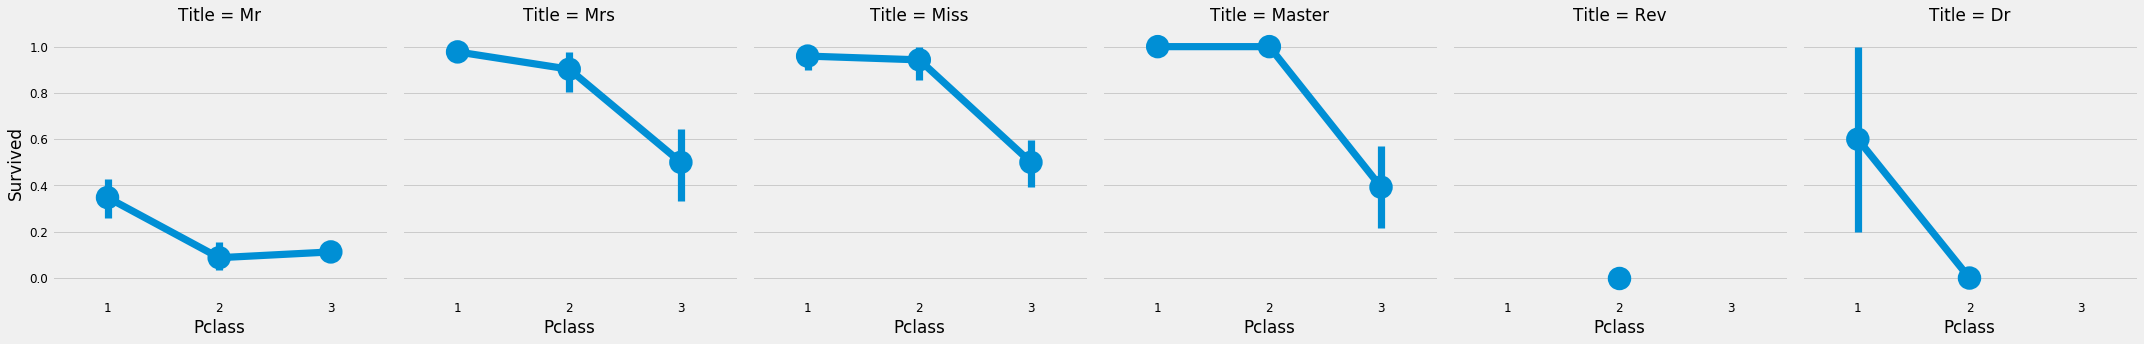

In [60]:
plt.style.use('fivethirtyeight')
sns.catplot('Pclass','Survived', col='Title', data=train, kind='point')
plt.show()

> **Observation(s)** 
- Women and girls fared better overall in survival chances
- Boys from 1st and 2nd class fared better too
- Boys from 3rd class had less chance of survival
- Overall survivor chances for men were slim

In [61]:
plt.style.use('default')

### Dividing the Age attribute into Age Category Intervals 

In [62]:
train['AgeCategory'] = pd.qcut(train['Age'], 4)
test['AgeCategory'] = pd.qcut(test['Age'], 4)

In [63]:
train['Age_Code'] = LabelEncoder().fit_transform(train['AgeCategory'])
test['Age_Code'] = LabelEncoder().fit_transform(test['AgeCategory'])

### Add family survival feature

#### This strategy was taken from [Titanic [0.82] - [0.83]](https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83)  which in turn was taken from [S.Xu's kernel ](https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever). Basically families (same last name) and people with same tickets are grouped together. No changes have been made to the code.

In [64]:
data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])

DEFAULT_SURVIVAL_VALUE = 0.5
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      data_df.loc[data_df['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [65]:
for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(data_df[data_df['Family_Survival']!=0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train['Family_Survival'] = data_df['Family_Survival'][:891]
test['Family_Survival'] = data_df['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


### Categorize the Sex Column

In [66]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Sex'].replace(['male','female'],[0,1],inplace=True)

## <a id='3.3'>3.3 Data Cleaning </a> 

Drop the columns that are not required and simplify the other features for prediction

### 2.  Drop columns that are not required 

In [67]:
drop_elements = ['PassengerId', 'Name', 'SibSp', 'Parch','Ticket', 'Cabin', 'FareCategory', 'AgeCategory','Age', 'Fare', 'Title', 'Embarked']


In [68]:
train = train.drop(drop_elements, axis=1)
test = test.drop(drop_elements, axis=1)

In [69]:
# Copying the Survived column data 
y = train['Survived']

In [70]:
X = train[train.columns[1:]]


### 3.  Clean Data

In [71]:
# Data is now clean and can be used in the models

In [72]:
train.head()

,Survived,Pclass,Sex,FamilySize,Fare_Code,Age_Code,Family_Survival
0,0,3,0,1,0,0,0.5
1,1,1,1,1,4,3,0.5
2,1,3,1,0,1,1,0.5
3,1,1,1,1,4,2,0.0
4,0,3,0,0,1,2,0.5


# <a id='4'>4. Models </a> 

## <a id='4.1'>4.1. Pipeline, ColumnTransformer </a> 

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### 1. Scaling the features

In [74]:
all_features = ['Pclass', 'Sex', 'FamilySize', 'Fare_Code', 'Age_Code', 'Family_Survival']

In [75]:
all_transformer = Pipeline(steps = [
    ('stdscaler', StandardScaler())
])

In [76]:
all_preprocess = ColumnTransformer(
    transformers = [
        ('allfeatures', all_transformer, all_features),
    ]
)

## <a id='4.2'>4.2. Split Data </a> 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=train['Survived'])

## <a id='4.3'>4.3 Evaluate Models </a> 

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score

### Running a set of classifiers with no hyper parameter tuning

In [79]:
classifiers = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    SGDClassifier(random_state=42),
    ]

In [80]:
first_round_scores = {}
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', all_preprocess),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    score = pipe.score(X_test, y_test)
    first_round_scores[classifier.__class__.__name__[:10]] = score
    print("model score: %.3f" % score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.804
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
model score: 0.816
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_it

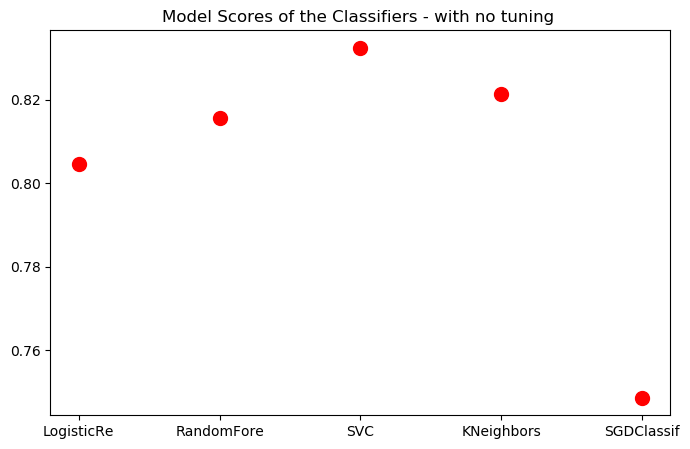

In [81]:
# Plot the model scores
plt.plot(first_round_scores.keys(), first_round_scores.values(), "ro", markersize=10)
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.title('Model Scores of the Classifiers - with no tuning ')
plt.show()

### Hyperparameter tuning may change the best classifier from the above graph

# <a id='5'>5. Hyper Parameters </a> 

## <a id='5.1'>5.1. Hyper Parameter Tuning </a> 

### 1. Logistic Regression HyperParameter Tuning

In [82]:
grid_scores = {}
log_clf = Pipeline(steps=[('preprocessor', all_preprocess),
                      ('classifier', LogisticRegression(random_state=42))])

log_param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10],
    'classifier__solver' : ['liblinear','lbfgs','sag', 'saga'],
    'classifier__max_iter' : [500],
}

log_grid_search = GridSearchCV(log_clf, log_param_grid, cv=10, iid=True)
log_grid_search.fit(X_train, y_train)

print('Logistic Regression - grid_search.best_params_ and best_scores_', log_grid_search.best_params_, log_grid_search.best_score_)
log_model_score = log_grid_search.score(X_test, y_test)
print("Logistic Regression - model score: ", log_model_score)
grid_scores['log'] = log_model_score

Logistic Regression - grid_search.best_params_ and best_scores_ {'classifier__C': 0.1, 'classifier__max_iter': 500, 'classifier__solver': 'lbfgs'} 0.827247191011236
Logistic Regression - model score:  0.8268156424581006


### 2. Random Forest HyperParameter Tuning

In [83]:
rf_clf = Pipeline(steps=[('preprocessor', all_preprocess),
                      ('classifier', RandomForestClassifier(random_state=42))])

rf_param_grid = {
    'classifier__n_estimators' : [50, 100],
    'classifier__max_features' : [2, 3],
    'classifier__criterion' : ['gini', 'entropy']
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10, iid=True)
rf_grid_search.fit(X_train, y_train)

print('Random Forest grid_search.best_params_ and best_scores_', rf_grid_search.best_params_, rf_grid_search.best_score_)
rf_model_score = rf_grid_search.score(X_test, y_test)
print("Random Forest - model score: ", rf_model_score)
grid_scores['rf'] = rf_model_score

Random Forest grid_search.best_params_ and best_scores_ {'classifier__criterion': 'gini', 'classifier__max_features': 2, 'classifier__n_estimators': 50} 0.848314606741573
Random Forest - model score:  0.8324022346368715


### 3. Support Vector HyperParameter Tuning

In [84]:
svm_clf = Pipeline(steps=[('preprocessor', all_preprocess),
                      ('classifier', SVC(random_state=42))])
svm_param_grid = [
    {'classifier__kernel': ['linear'], 'classifier__C': [10., 30., 100., 300.]},
    {'classifier__kernel': ['rbf'], 'classifier__C': [1.0, 3.0, 10., 30., 100., 300.],
     'classifier__gamma': [0.01, 0.03, 0.1, 0.3, 1.0]},
    ] 

svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=10, iid=True)
svm_grid_search.fit(X_train, y_train)

print('SVM grid_search.best_params_ and best_scores_', svm_grid_search.best_params_, svm_grid_search.best_score_)
svm_model_score = svm_grid_search.score(X_test, y_test)
print("SVM - model score: ", svm_model_score)
grid_scores['svm'] = svm_model_score

SVM grid_search.best_params_ and best_scores_ {'classifier__C': 3.0, 'classifier__gamma': 0.3, 'classifier__kernel': 'rbf'} 0.8539325842696629
SVM - model score:  0.7988826815642458


### 4. KNN HyperParameter Tuning

In [85]:
knn_clf = Pipeline(steps=[('preprocessor', all_preprocess),
                      ('classifier', KNeighborsClassifier())])
knn_param_grid = {
    'classifier__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 24, 26 ],
    'classifier__weights': ['uniform', 'distance' ],
    'classifier__leaf_size': list(range(1,50,5)),
}

knn_grid_search = GridSearchCV(knn_clf, knn_param_grid, cv=10, iid=True, scoring ='roc_auc')
knn_grid_search.fit(X_train, y_train)

print('KNN grid_search.best_params_ and best_scores_', knn_grid_search.best_params_, knn_grid_search.best_score_)
knn_model_score = knn_grid_search.score(X_test, y_test)
print("KNN - model score: ", knn_model_score)
grid_scores['knn'] = knn_model_score

KNN grid_search.best_params_ and best_scores_ {'classifier__leaf_size': 41, 'classifier__n_neighbors': 16, 'classifier__weights': 'uniform'} 0.8938504533903998
KNN - model score:  0.8352437417654808


### 5. SGD HyperParameter Tuning

In [86]:
sgd_clf = Pipeline(steps=[('preprocessor', all_preprocess),
                      ('classifier', SGDClassifier(random_state=42))])

sgd_param_grid = {
    'classifier__max_iter': [100, 200],
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
}

sgd_grid_search = GridSearchCV(sgd_clf, sgd_param_grid, cv=10, iid=True)
sgd_grid_search.fit(X_train, y_train)

print('SGD grid_search.best_params_ and best_scores_', sgd_grid_search.best_params_, sgd_grid_search.best_score_)
sgd_model_score = sgd_grid_search.score(X_test, y_test)
print("SGD - model score: ", sgd_model_score)
grid_scores['sgd'] = sgd_model_score

SGD grid_search.best_params_ and best_scores_ {'classifier__alpha': 0.001, 'classifier__max_iter': 100} 0.8202247191011236
SGD - model score:  0.8268156424581006


### 6. Plotting the model scores (with hyper parameter tuning)

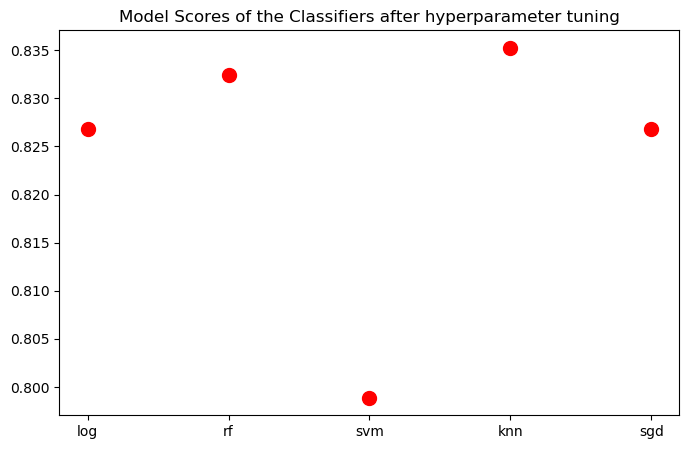

In [87]:
plt.plot(grid_scores.keys(), grid_scores.values(), "ro", markersize=10)
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.title('Model Scores of the Classifiers after hyperparameter tuning')
plt.show()

### The best classifier after hyperparameter tuning has changed 

## <a id='5.2'>5.2. Choose final prediction model </a> 

Choose the final prediction model from the graph after hyper parameter tuning

- Choosing **KNeighborsClassifier** as that gave the best scores overall

## <a id='5.3'>5.3. Prediction </a> 

In [88]:
final_pipe = Pipeline(steps=[('preprocessor', all_preprocess)])

In [89]:
X_final_processed = final_pipe.fit_transform(X)

In [90]:
test_final_processed = final_pipe.transform(test)

### Train the model on all of the training data along with hyperparameter tuning

In [91]:
knn_hyperparameters = {
    'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22],
    'algorithm' : ['auto'],
    'weights': ['uniform', 'distance'],
    'leaf_size': list(range(1,50,5)),
}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = knn_hyperparameters,  
                cv=10, scoring = "roc_auc")

gd.fit(X_final_processed, y)
print(gd.best_score_)
print(gd.best_estimator_)

0.879570975642805
KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


In [92]:
gd.best_estimator_.fit(X_final_processed, y)
y_pred = gd.best_estimator_.predict(test_final_processed)

#### The above prediction when tested showed lower score 

In [93]:
# Tested with different values for n_neighbors and n_jobs and came to this KNN classifier

In [94]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=None, n_neighbors=6, p=2, 
                           weights='uniform')
knn.fit(X_final_processed, y)
y_pred = knn.predict(test_final_processed)

# <a id='6'>6. Submission  </a> 

In [95]:
submission = pd.DataFrame(pd.read_csv("../input/test.csv")['PassengerId'])
submission['Survived'] = y_pred
submission.to_csv("submission.csv", index = False)

### Final thoughts 
- Tried imputing the 'Cabin' feature using 'missing' as the value for the NaN values but it did not work out.
- For some reason the feature 'Embarked' lowered my scores. So finally droppped it.
- Found that using std scaler improved the scores overall. I had initially used only One Hot Encoding and it generated sparse matrix which took me tantalizing close to 80% (0.799)! 
- Tried using F1 Scores to choose the final model but it did not work out. 
